# EDA

#comment
#observations
while doing EDA , having these two is a good practice in each line while doing the EDA,,,,,, its a kind of report to the EDA that we are doing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline                    
import warnings
warnings.filterwarnings('ignore')

 The % notation is for using the magic functions available in python, and %matplotlib inline, represents the magic function %matplotlib, which specifies the backend for matplotlib, and with the argument inline you can display the graph and make the plot interactive.
Basically it will make the plot visible here in jupyter notebook only, instead of opening a new window.

In [3]:
data = pd.read_csv("student.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# Basic profile building stuff

In [5]:
data.shape

(1000, 8)

no need to learn the code
just know basic stuff how to do the EDA:
* you should be able to tell the type of feature/column that is numerical(discrte or continuos) or categorical(nominal or ordinal)
* or various other segregation of data like below:


In [6]:
data.info()   ###it will about the datatypes of the columns/features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data['gender'].dtype   ### giving datatype of particular column

dtype('O')

In [8]:
data['gender'].dtype=='O'

True

In [9]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
[fea for fea in data.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [11]:
cat_col=[fea for fea in data.columns if data[fea].dtype=='O']

In [12]:
num_col=[fea for fea in data.columns if data[fea].dtype!='O']

In [13]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [14]:
num_col[0]

'math score'

In [15]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [16]:
data.memory_usage()   #### it tells how much memory they are occupying in RAM{{{{in byte format}}}}

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

#### Missing value

In [17]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
[feature for feature in data.columns if data[feature].isnull().sum()>0]   ###this would have shown the feature/column in the dataframe which have null value,,,so not coming of anything means there is no feature in the dataframe which have any value missing

[]

<AxesSubplot:>

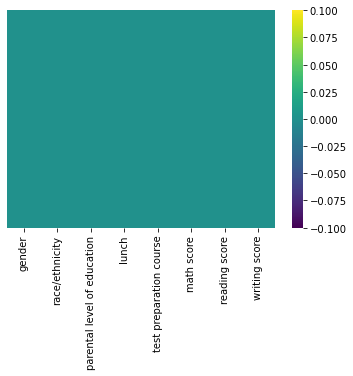

In [10]:
## we can also find out whether dataframe has any feature/column/dataset with any missing value using heatmap:
sns.heatmap(data.isnull(),cmap='viridis')

In [19]:
data.isnull().sum().sum()

0

#### duplicate value

In [20]:
data.duplicated()  ###checking w.r.t. each row

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [21]:
data.duplicated().sum()

0

#### unique values

In [22]:
data.nunique()   ###it tells the number of unique values in particular feature/column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
data['gender'].nunique()

2

In [24]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

# Basic Statistical analysis

In [25]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


"min" column to "max" column is dispersion of data.

In [27]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Correlation values range between -1 and 1.
There are two key components of a correlation value:
* magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
* sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.
a very small value for the correlation between x and y, indicating no correlation

In [28]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


The fact is covariance and correlation are very closely related to each other and also at the same time they have so many differences.

Covariance tends to define the type of interaction between variables, and correlation does the same too but it also defines the strength of the relationship.

For this, plenty of time correlation is called as the special case of covariance. Though if anyone has to pick between the two, so many analysts prefer to choose correlation as it does not get affected by the changes in dimensions, locations, and scale.

In [29]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

negative value means left skewed,,,we can also see it by plotting as below:

<AxesSubplot:xlabel='math score', ylabel='Density'>

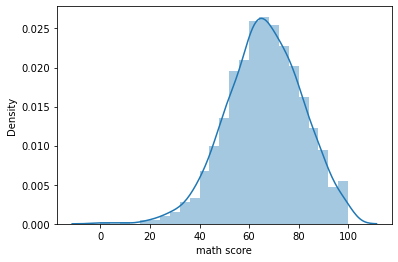

In [30]:
sns.distplot(data['math score'])       ####distribution plot

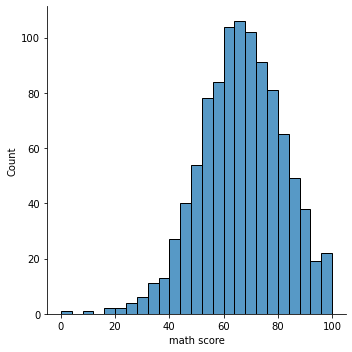

In [31]:
sns.displot(data['math score'])    ###it is a histogram , and smoothening of it gives a distribution plot that we have seen above.

In [32]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [33]:
data['math score']+data['reading score']+data['writing score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64

In [34]:
(data['math score']+data['reading score']+data['writing score'])/3

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [35]:
data['average'] = (data['math score']+data['reading score']+data['writing score'])/3

In [36]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [37]:
data.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [38]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


#question: you have to find out no of student whoever is having less than 30 marks math

In [39]:
data['math score']<30

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [40]:
data[data['math score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [41]:
data[data['math score']<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
average                        14
dtype: int64

p value
if p>0.05, then my data will be normally distributed

In [42]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average'],
      dtype='object')

In [43]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [44]:
data_num = data[num_col]

In [45]:
data_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [46]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [47]:
from scipy.stats import normaltest

In [48]:
normaltest(data_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [49]:
normaltest(data_num['math score'])[1]

0.00045080293869937836

In [50]:
normaltest(data_num['math score'])[1]*100

0.04508029386993784

the above test will give p value to test whether the distribution is normal or not
like here the pvlaue<0.05 theerfore this data's distribution will not be normal
to further see, we can see its plot:

<AxesSubplot:xlabel='math score', ylabel='Density'>

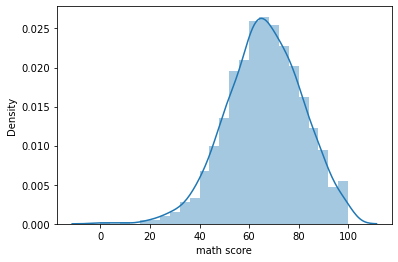

In [51]:
sns.distplot(data_num['math score'])

as we can see, it is a little bit of skewed(left), hence not normally distributed

#### finding outlier

## Percentile vs. Quartile vs. Quantile

Three terms that students often confuse in statistics are percentiles, quartiles, and quantiles.

Here’s a simple definition of each:

Percentiles: Range from 0 to 100.

Quartiles: Range from 0 to 4.

Quantiles: Range from any value to any other value.

Note that percentiles and quartiles are simply types of quantiles.

Some types of quantiles even have specific names, including:

4-quantiles are called quartiles.
5-quantiles are called quintiles.
8-quantiles are called octiles.
10-quantiles are called deciles.
100-quantiles are called percentiles.
Note that percentiles and quartiles share the following relationship:

0 percentile = 0 quartile (also called the minimum)
25th percentile = 1st quartile
50th percentile = 2nd quartile (also called the median)
75th percentile = 3rd quartile
100th percentile = 4th quartile (also called the maximum)

0  25   50  75  100     IQR(inter quartile range), is spread of the data    Q1   Q2  Q3  Q4                         = Q3 -Q1 

upper limit(lower fence) = Q3+(1.5*IQR)
lower limit(upper fence) = Q1-(1.5*IQR)

<AxesSubplot:>

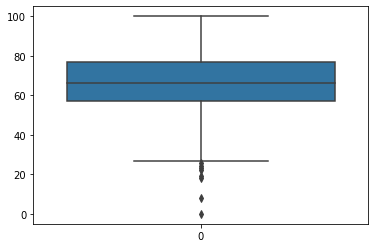

In [52]:
sns.boxplot(data=data_num['math score'])

<AxesSubplot:>

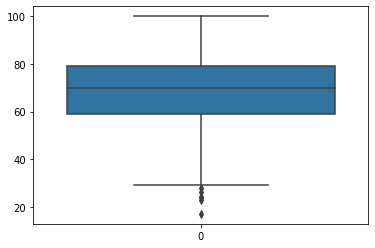

In [53]:
sns.boxplot(data=data_num['reading score'])

<AxesSubplot:>

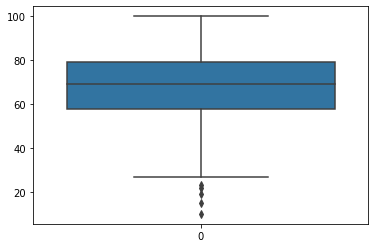

In [54]:
sns.boxplot(data=data_num['writing score'])

even from boxplot we can conclude athat outliers are on the left side of th edistribution , i.e, there distribution plots will be left skewed/negative skewed

In [55]:
q1 = data['math score'].quantile(0.1)   ##that means 10 percent data is till 47,,,,,here at 10 percent we have taken the q1

In [56]:
q1

47.0

In [57]:
q3 = data['math score'].quantile(0.9)   ##that 90 percent data is till 86,,,,,,,this is the q3 that we have considered here at 90 percent

In [58]:
q3

86.0

In [59]:
data['math score'].min()

0

In [60]:
data['math score'].max()

100

In [61]:
data['math score'].quantile(1)

100.0

In [62]:
IQR = q3-q1

In [63]:
upper_limit = q3+(1.5*IQR)   ###upper fence

In [64]:
upper_limit

144.5

In [65]:
lower_limit = q1-(1.5*IQR)      ### lower fence

In [66]:
lower_limit

-11.5

and we can trim the data beyond these upper and lower limit, basically this upper and lower fence is calculated so that wjatever comes beyong these limits, an outlier can be removed/handled

In [67]:
data['math score']<lower_limit

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [68]:
data[data['math score']<lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [69]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


###### Note:
that means there is no data beyond the lower fence(lower limit) and upper fence(upper limit), as we know the minimum value and maximum value in the math score is 0 and 100 respectively, so obviously there is no data less than lower limit and greater than the upper limit, i.e., no outlier, according to the q1= 0.01 and q3 = 0.90
so, now we will chose different quarter1 and quarter3, so that we can trim outliers,, this is the way outliers are handeled by data scientists.

In [70]:
q1 = data['math score'].quantile(0.25)

In [71]:
q3 = data['math score'].quantile(0.75)

In [72]:
IQR = q3-q1

In [73]:
upper_limit = q3+(1.5*IQR)

In [74]:
upper_limit

107.0

In [75]:
lower_limit = q1-(1.5*IQR)

In [76]:
lower_limit

27.0

In [77]:
data[data['math score']<lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [78]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


now, these data that we have got lower than the lower limit are outliers, that we will remove/handle by:
* dropping them like we normally drop data from the dataframe in pandas:
data_outlier = data[data['math score']<lower_limit]  
##this will save the outliers' data in this 'data_outlier variable, then we will drop them
data_num.drop(data_outlier.index)
* or we can replace them with lower limit.

Writing function to do the same process of getting the outlier using quantiles as above.

In [79]:
def outlier_threshold(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    up_limit = q3+(1.5*iqr)
    lo_limit = q1-(1.5*iqr)
    return lo_limit,up_limit

In [84]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

# Graph based analysis

no need to plot these graph plotting syntaxes

In [92]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


univariate analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

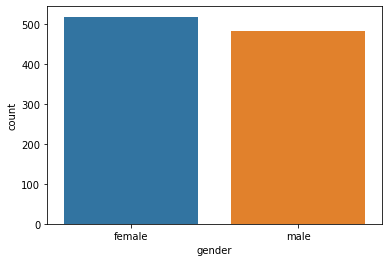

In [93]:
sns.countplot(data["gender"])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

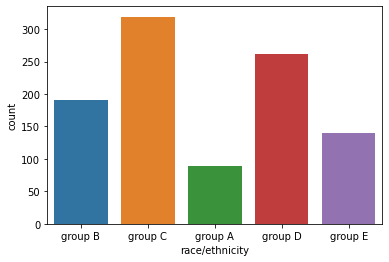

In [94]:
sns.countplot(data["race/ethnicity"])

as we can see there is some imbalance as the count with respect to particular categories differ, as we can countg of group c is very high but of a is very low. 

In [95]:
data.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [96]:
df =data.groupby('gender').mean()

In [97]:
df['average']

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [98]:
df['average'][0]

69.56949806949807

In [99]:
df['average'][1]

65.8374827109267

In [101]:
df['math score'][0]

63.633204633204635

In [102]:
df['math score'][1]

68.72821576763485

In [108]:
df['average'][0],df['math score'][0]

(69.56949806949807, 63.633204633204635)

In [109]:
female_score = df['average'][0],df['math score'][0]

In [110]:
female_score

(69.56949806949807, 63.633204633204635)

<BarContainer object of 2 artists>

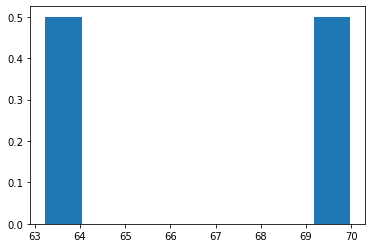

In [115]:
plt.bar(female_score,0.5,label = 'female')    ###0.5 is just the height we have given to the bar,, can give any other value also


In [119]:
male_score = df['average'][1],df['math score'][1]

<BarContainer object of 2 artists>

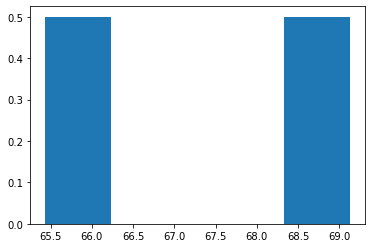

In [120]:
plt.bar(male_score,0.5,label = 'male')

<BarContainer object of 2 artists>

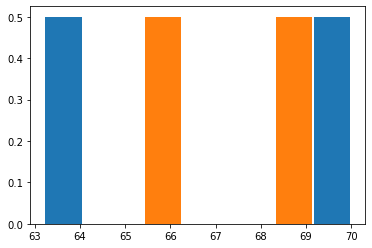

In [121]:
plt.bar(female_score,0.5,label = 'female')
plt.bar(male_score,0.5,label = 'male')

univariant and bivariant analysis

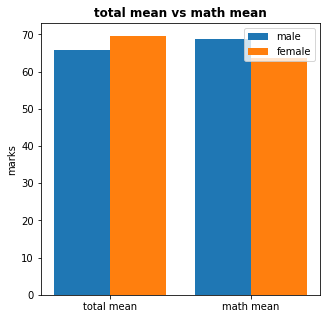

In [128]:
plt.figure(figsize=(5,5))
X =['total mean','math mean']
female_score= df['average'][0],df['math score'][0]
male_score = df['average'][1], df['math score'][1]
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total mean vs math mean",fontweight='bold')
plt.legend()
plt.show()

no need to memorize the syntax to plot the grapj that we plotted above,,, you can google it online whenever you want,,, just know what we are doing in the plot,,, how to do the analysis w.r.t. that plot

In [129]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [130]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

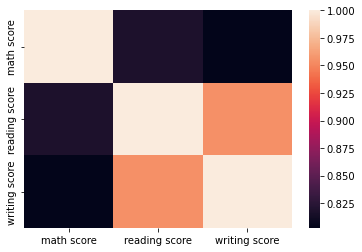

In [131]:
sns.heatmap(data_num.corr())

<AxesSubplot:>

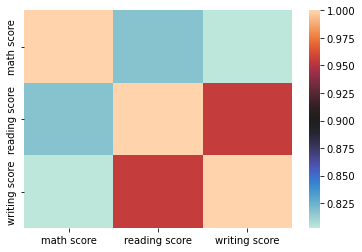

In [134]:
sns.heatmap(data_num.corr(), cmap='icefire')


<AxesSubplot:>

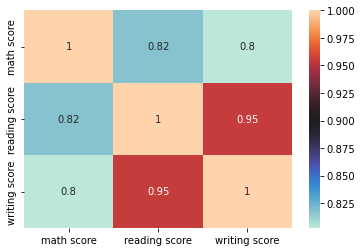

In [137]:
sns.heatmap(data_num.corr(),cmap='icefire',annot = True)     ### this will show the correlation value, basically annotations

<AxesSubplot:>

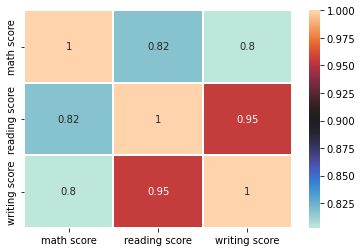

In [140]:
sns.heatmap(data_num.corr(),cmap='icefire',annot = True,linewidth =.3)   ##linewidth here is almost redundant it will just give line between the boxes that are defining the correlation

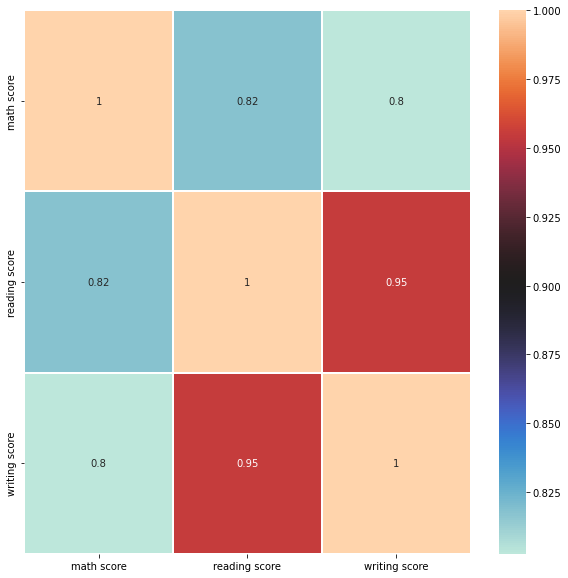

In [142]:
sns.heatmap(data_num.corr(),cmap='icefire',annot = True,linewidth =.3)
fig = plt.gcf()                              ##here just referring the current plot(the one we are plotting now, using this code above,, so that we can do some modification to that referred plot)
fig.set_size_inches(10,10)

Text(0.5, 1.0, 'corr between variable')

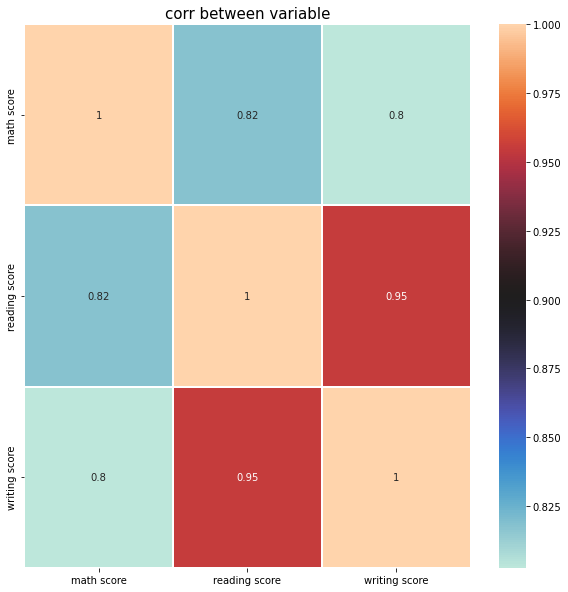

In [143]:
sns.heatmap(data_num.corr(),cmap='icefire',annot = True,linewidth =.3)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)

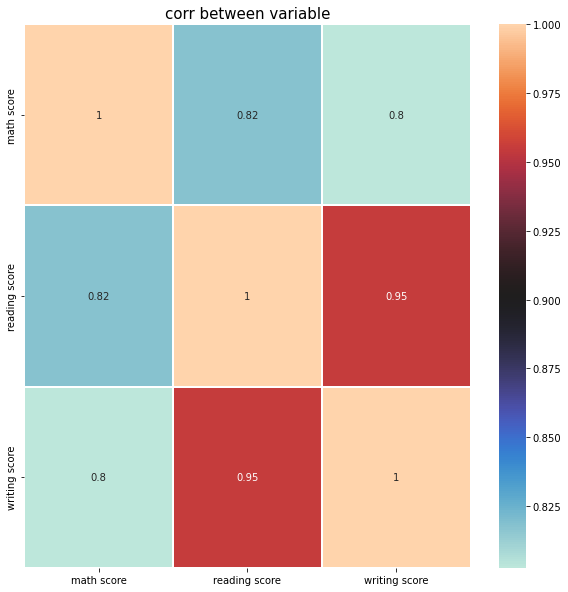

In [144]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()                                            ###as we are here using jupyter notebook, therefore plt.show() is redundant,,, but we rae plotting in some other IDE then it is advised to use plt.show(), otherwise the graph will not plotted

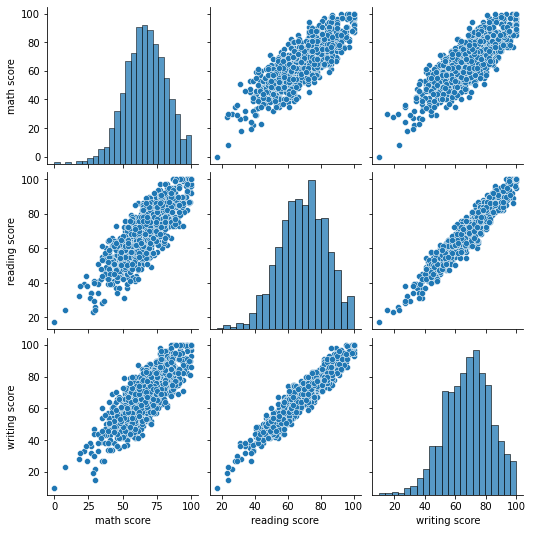

In [145]:
sns.pairplot(data_num)

<AxesSubplot:>

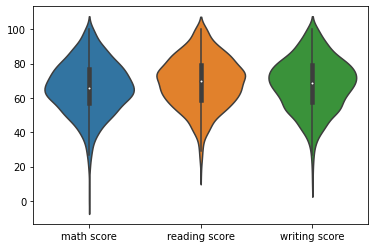

In [146]:
sns.violinplot(data=data_num)    ### in this te pointed part of the graph is because of outliers

<AxesSubplot:xlabel='math score', ylabel='writing score'>

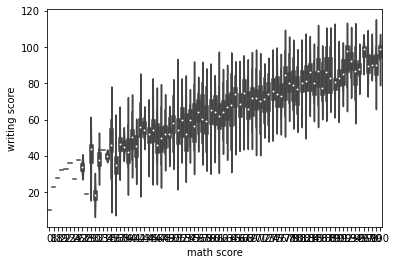

In [147]:
sns.violinplot(data = data_num, x = data_num['math score'],y = data_num['writing score'])

In [148]:
data_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [151]:
data_num.loc[data_num['math score']<lower_limit,'math score']  ##this will locate only those values in the math score column which are less than lower limit

17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [152]:
data_num.loc[data_num['math score']<lower_limit,'math score']= lower_limit    ####this will replace all those located values which are less than lower limit with the lower limit of this 'math score' column,,,,,,,tis is the way we are habdling the outlier

In [159]:
data_num['math score']    ###this is showing the whole 'math score' column with lower limit value in place of outliers

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [160]:
data_num.loc[data_num['math score']<lower_limit,'math score']     ###checking that is there any outlier,,, result of it shows there is no outlier now ,,, as we have replaced it with lower limit of this column

Series([], Name: math score, dtype: int64)

####general function to do the eda w.r.t. outlier finding and handling
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2
    +(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit


def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit
        
        
replace_with_threshold(data_num, data_num.columns)   ###calling the function that will replace the outlier if any exists

<AxesSubplot:>

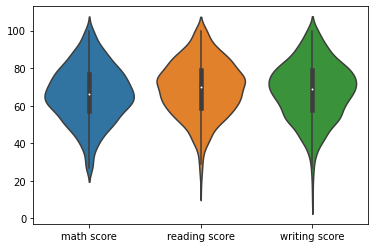

In [164]:
sns.violinplot(data=data_num)   ###now in the graph of 'math score', we can see that the pointed that was previously there , now no more as we have adjusted the outlier valies

###### some other EDA of this data

In [10]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
data = data.rename(columns = {"race/ethnicity":"race"})   ###renamed beacuse while performing the valu_count operation on the column, it was not working

In [14]:
data.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
data.race.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

In [19]:
data.race.value_counts().index

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object')

In [20]:
races = data.race.value_counts().index

In [21]:
 data.race.value_counts().values

array([319, 262, 190, 140,  89], dtype=int64)

In [22]:
races_num = data.race.value_counts().values

([<matplotlib.patches.Wedge at 0x29aec8394c0>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')])

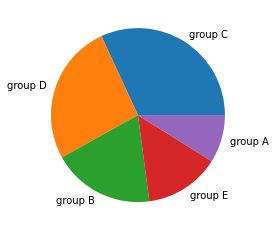

In [26]:
# pie chart

plt.pie(races_num,labels = races)

([<matplotlib.patches.Wedge at 0x29aef645940>,
 [Text(0.2944300774287808, 1.0598636372219223, 'group C'),
  Text(-0.9515054084391751, -0.5519397228964399, 'group D'),
  Text(0.7864842302881184, -0.769053025160233, 'group B')])

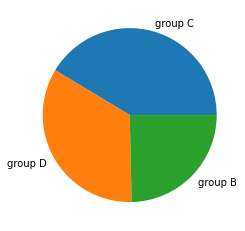

In [30]:
##in case if many values are there in place of only five values here,,,, the we plot top three in the pie plot

plt.pie(races_num[:3],labels =races[:3])

([<matplotlib.patches.Wedge at 0x29aef682d90>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.90%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.20%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.00%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.00%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.90%')])

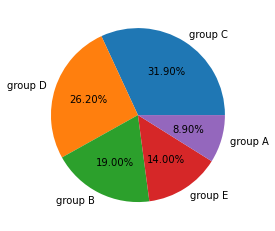

In [31]:
plt.pie(races_num,labels = races, autopct ='%1.2f%%')  ##the 2 is used so that after percentage upto two values can be shown.

([<matplotlib.patches.Wedge at 0x29aef7c8f70>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.20%')])

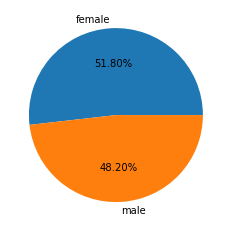

In [35]:
plt.pie(data.gender.value_counts().values, labels=data.gender.value_counts().index,autopct='%1.2f%%')

In [36]:
##insight, almost equal presence of both genders in school

In [42]:
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [39]:
data.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [41]:
data.groupby(['math score','reading score','writing score',]).size()

math score  reading score  writing score
0           17             10               1
8           24             23               1
18          32             28               1
19          38             32               1
22          39             33               1
                                           ..
100         92             97               1
            96             86               1
            97             99               1
            100            93               1
                           100              3
Length: 978, dtype: int64

In [45]:
data.groupby(['math score','gender']).size()

math score  gender
0           female    1
8           female    1
18          female    1
19          female    1
22          female    1
                     ..
98          male      2
99          female    2
            male      1
100         female    3
            male      4
Length: 147, dtype: int64

In [46]:
data.groupby(['math score','gender']).size().reset_index()

,math score,gender,0
0,0,female,1
1,8,female,1
2,18,female,1
3,19,female,1
4,22,female,1
...,...,...,...
142,98,male,2
143,99,female,2
144,99,male,1
145,100,female,3


In [47]:
data.groupby(['math score','gender']).size().reset_index().rename(columns={0:'counts'})

,math score,gender,counts
0,0,female,1
1,8,female,1
2,18,female,1
3,19,female,1
4,22,female,1
...,...,...,...
142,98,male,2
143,99,female,2
144,99,male,1
145,100,female,3


In [48]:
#gender based math score dataframe/table formed by us:
genbased_score= data.groupby(['math score','gender']).size().reset_index().rename(columns={0:'counts'})

In [49]:
genbased_score

,math score,gender,counts
0,0,female,1
1,8,female,1
2,18,female,1
3,19,female,1
4,22,female,1
...,...,...,...
142,98,male,2
143,99,female,2
144,99,male,1
145,100,female,3


In [52]:
genbased_score.head(20)

,math score,gender,counts
0,0,female,1
1,8,female,1
2,18,female,1
3,19,female,1
4,22,female,1
5,23,female,1
6,24,female,1
7,26,female,1
8,27,female,1
9,27,male,1


insight: more number of femails who got marks less than 30 in maths

<AxesSubplot:xlabel='math score', ylabel='counts'>

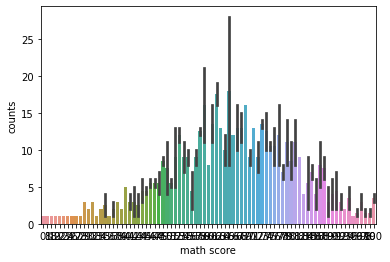

In [59]:

sns.barplot(x='math score', y = 'counts', data =genbased_score)

<AxesSubplot:xlabel='math score', ylabel='counts'>

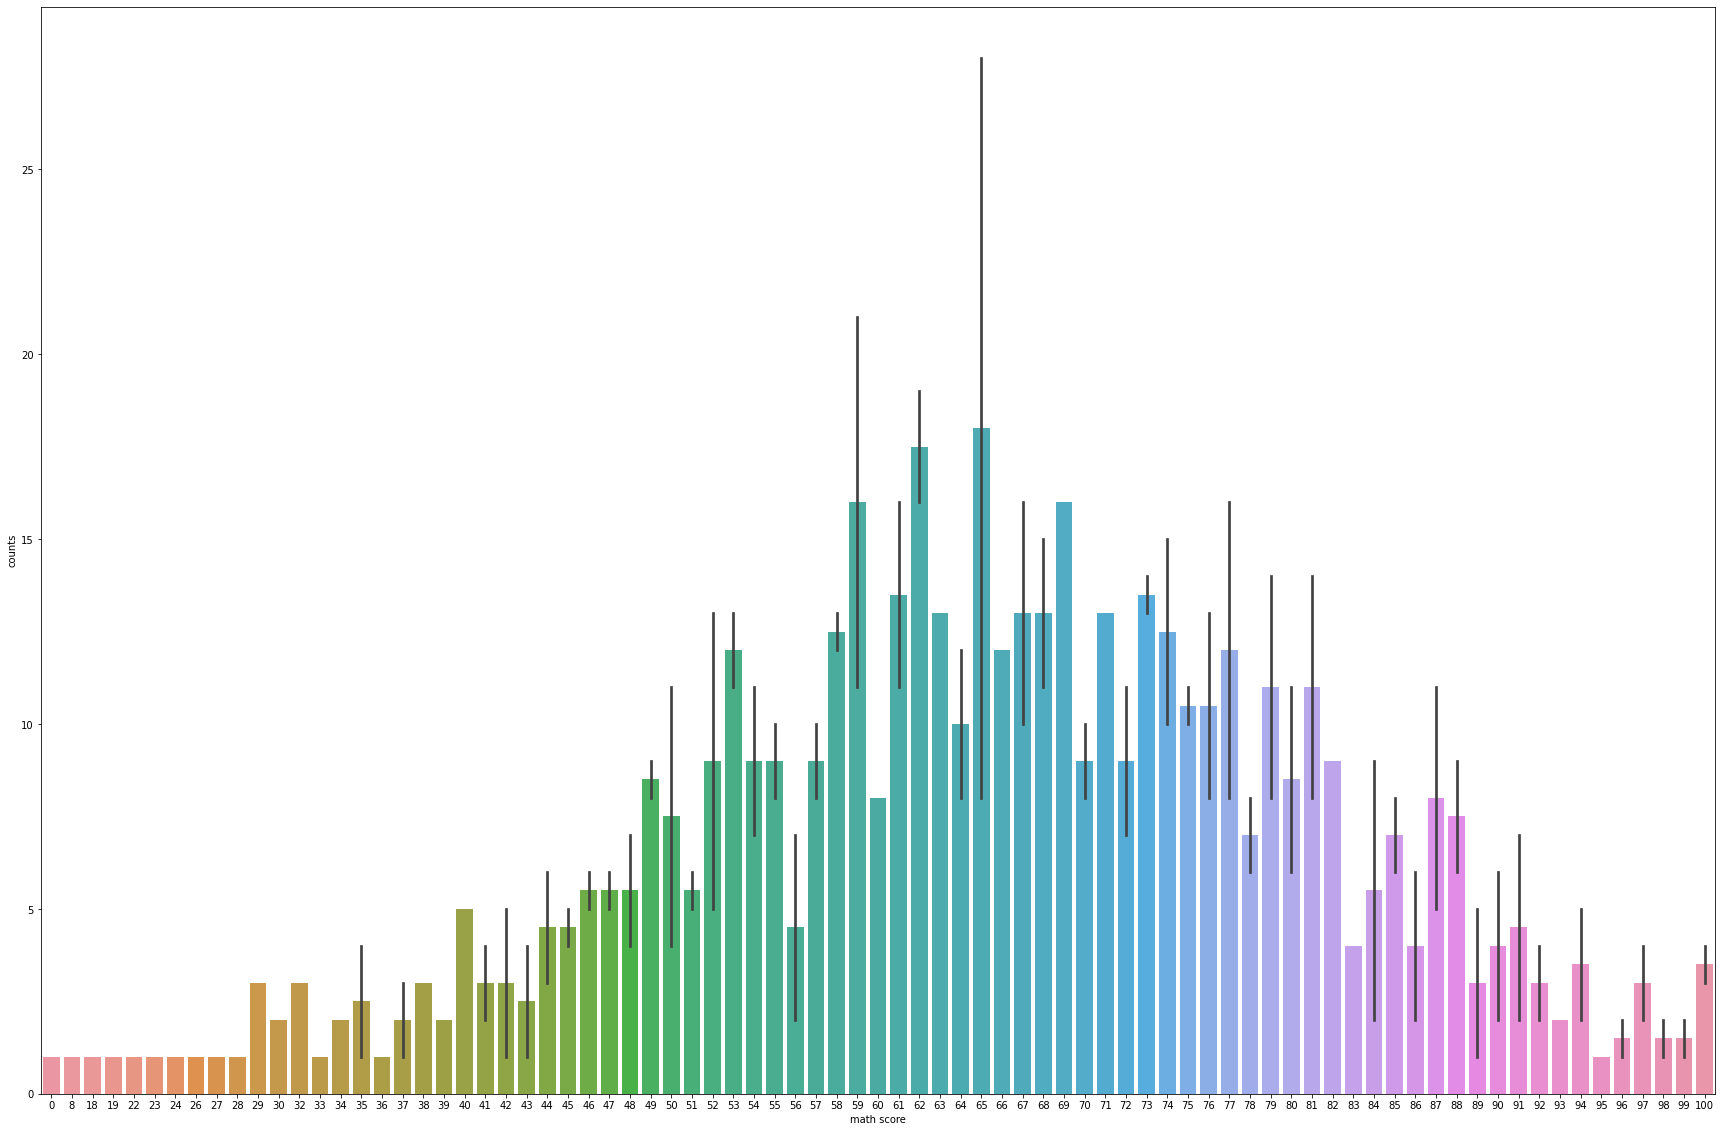

In [61]:
plt.figure(figsize=(30,20))
sns.barplot(x='math score', y = 'counts', data =genbased_score)

<AxesSubplot:xlabel='math score', ylabel='counts'>

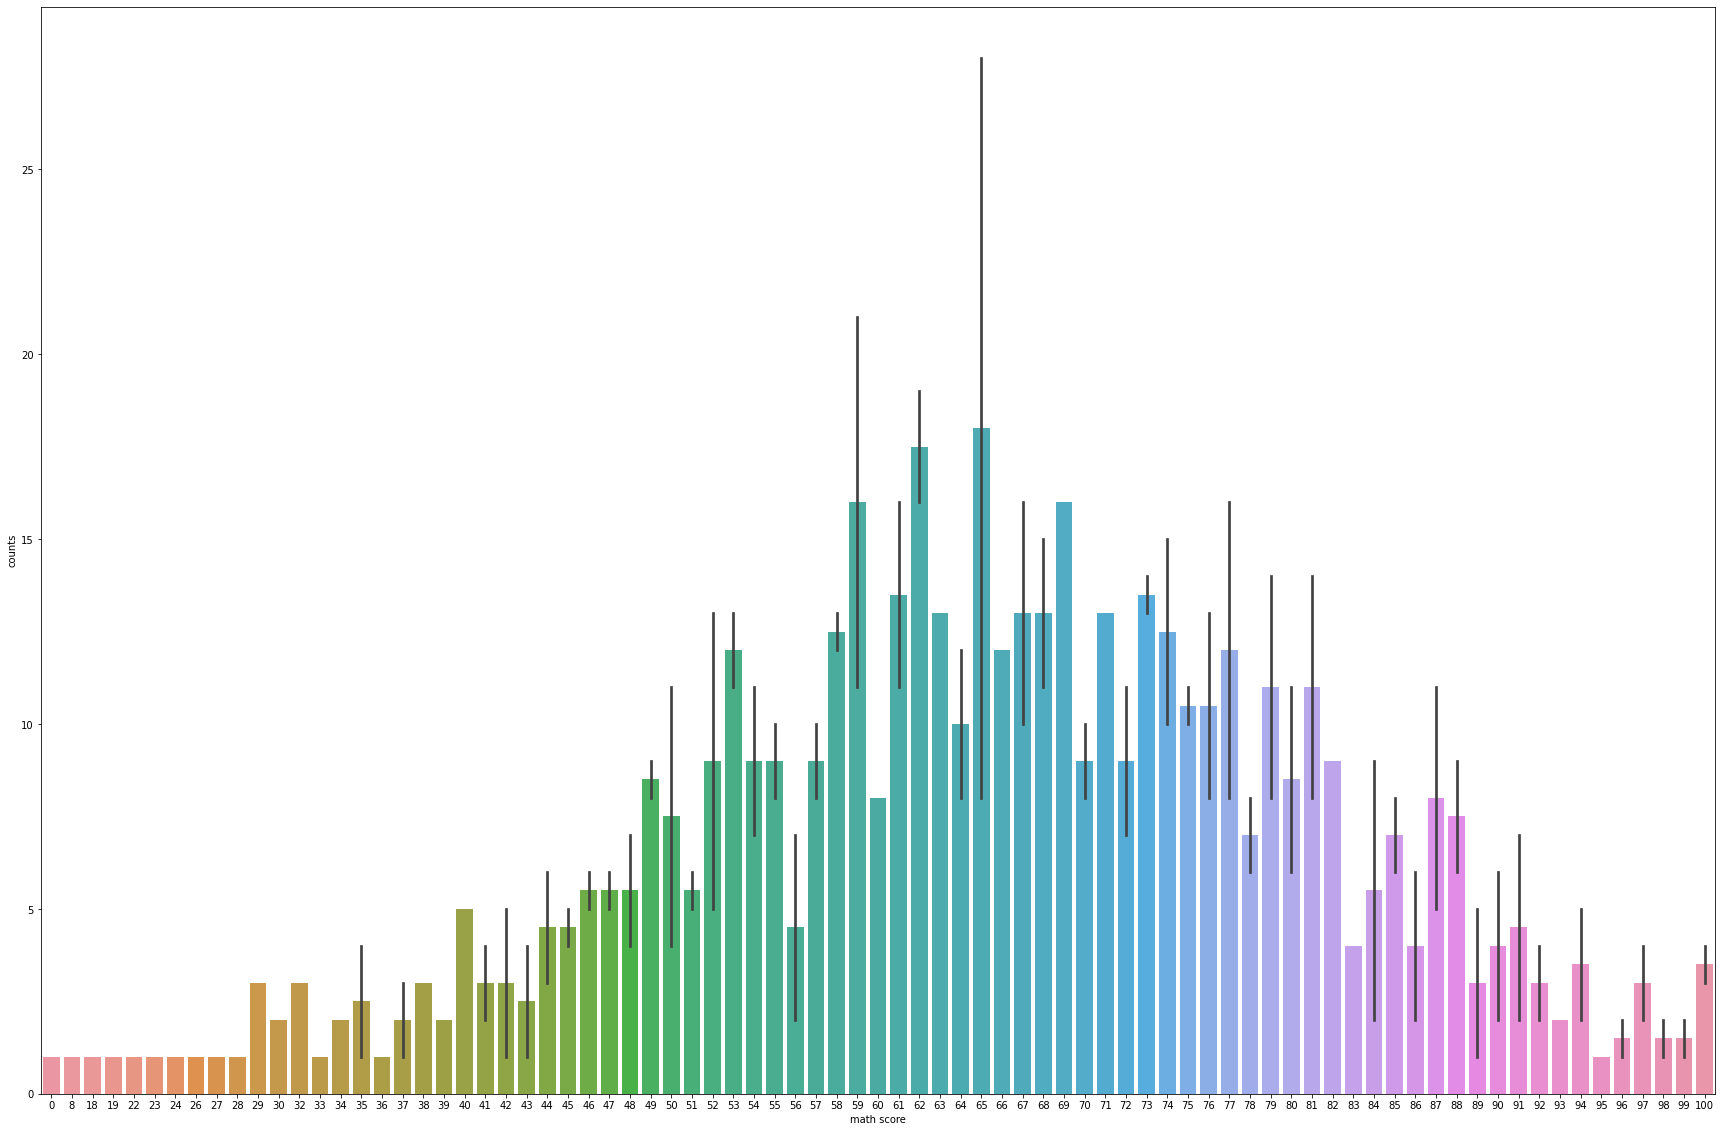

In [67]:
###another way to increase the size of the barplot using matplotlib library

import matplotlib
matplotlib.rcParams['figure.figsize']=(30,20)
sns.barplot(x='math score', y = 'counts', data =genbased_score)

<AxesSubplot:xlabel='math score', ylabel='counts'>

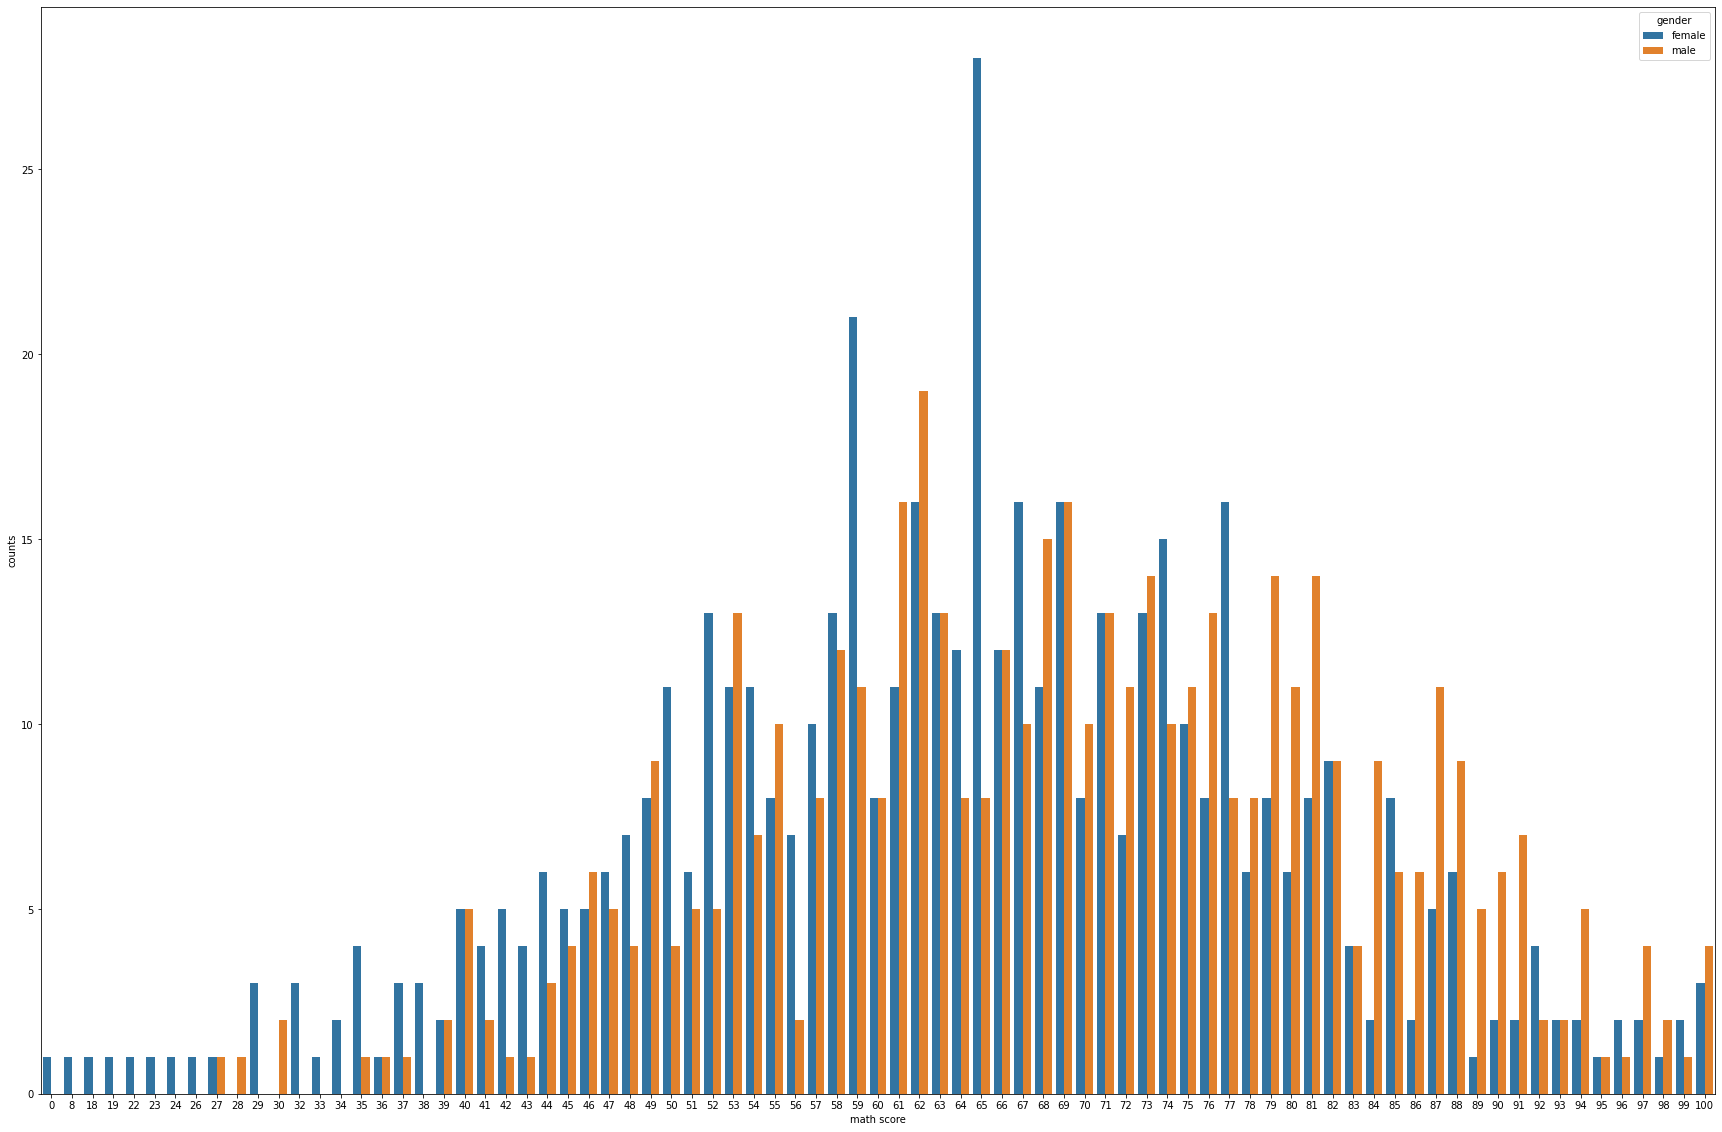

In [69]:
##now bars plotted with colour as per the gender

plt.figure(figsize=(30,20))
sns.barplot(x='math score', y = 'counts', hue ='gender',data =genbased_score)

<AxesSubplot:xlabel='math score', ylabel='counts'>

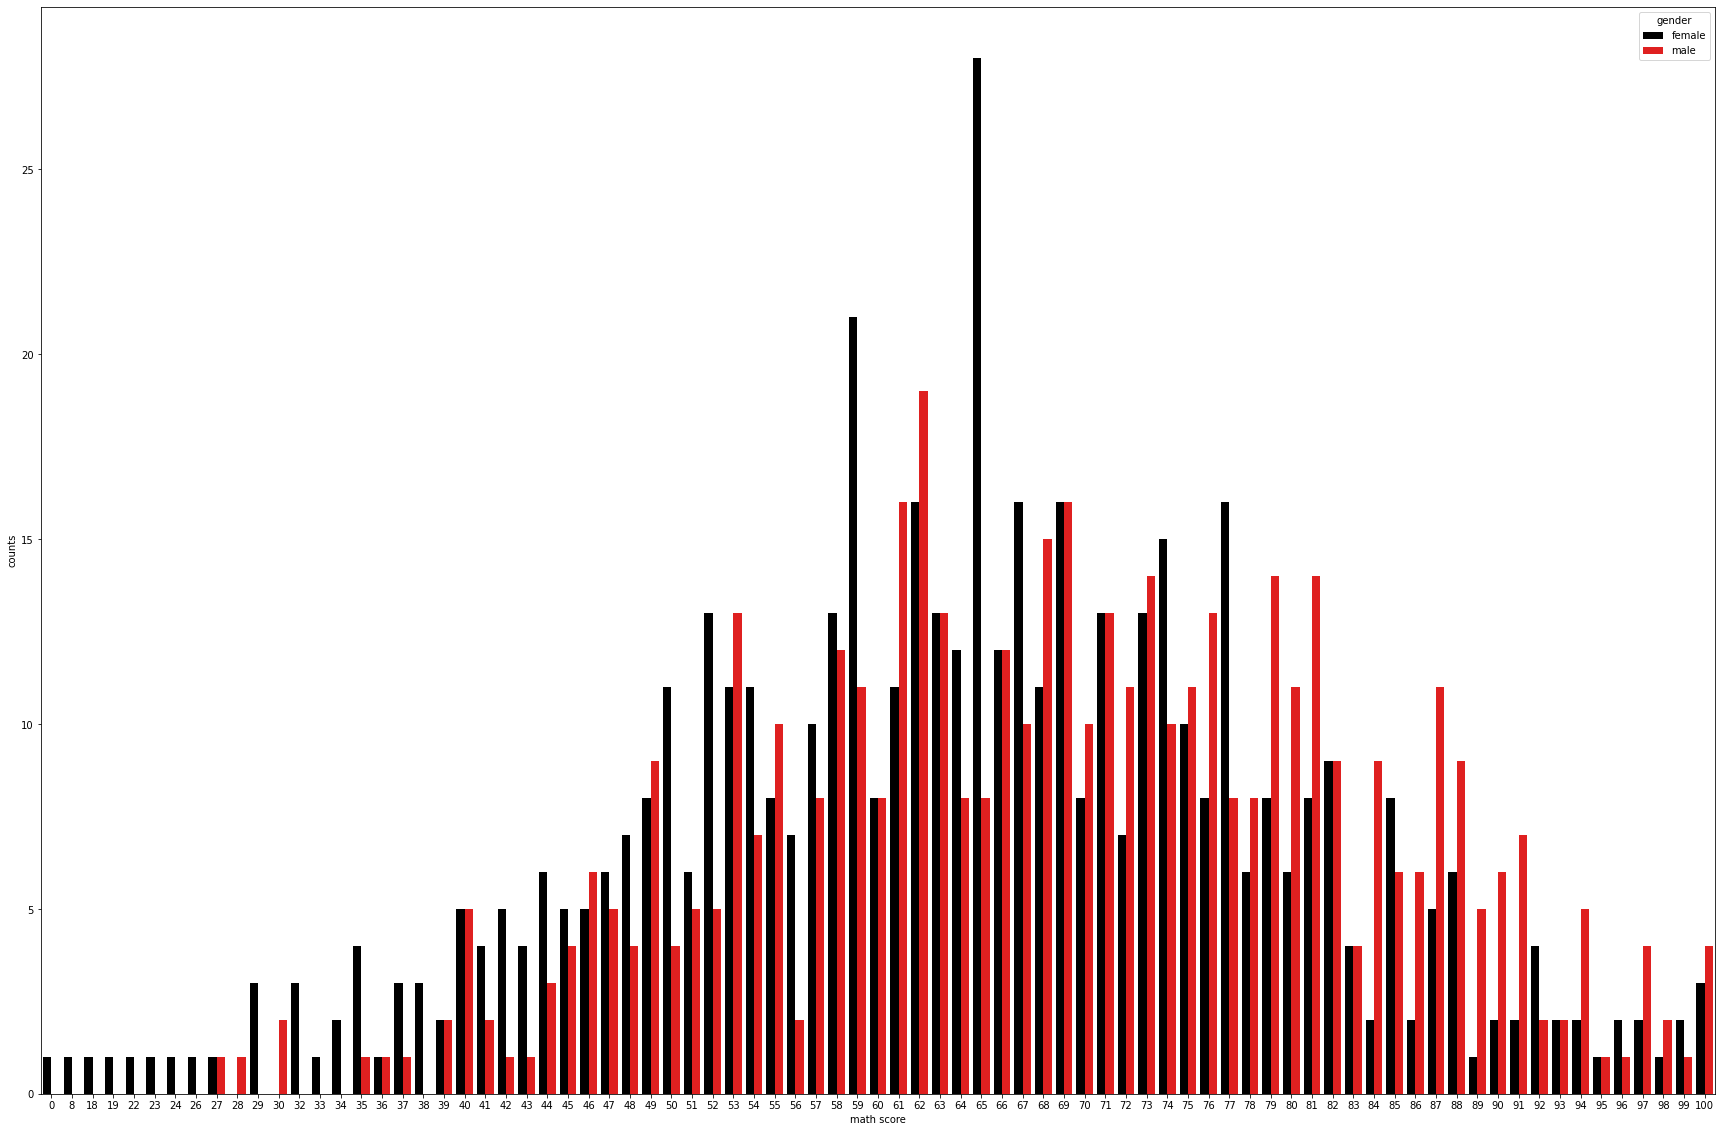

In [71]:
##and the colours could be changed

plt.figure(figsize=(30,20))
sns.barplot(x='math score', y = 'counts', hue ='gender',data =genbased_score, palette =['black','red'])

###### observation/insight:
* maximum studets with marks less than 30 were females
* most studemts got marks in between 50 an 80 approximately


<AxesSubplot:xlabel='gender', ylabel='count'>

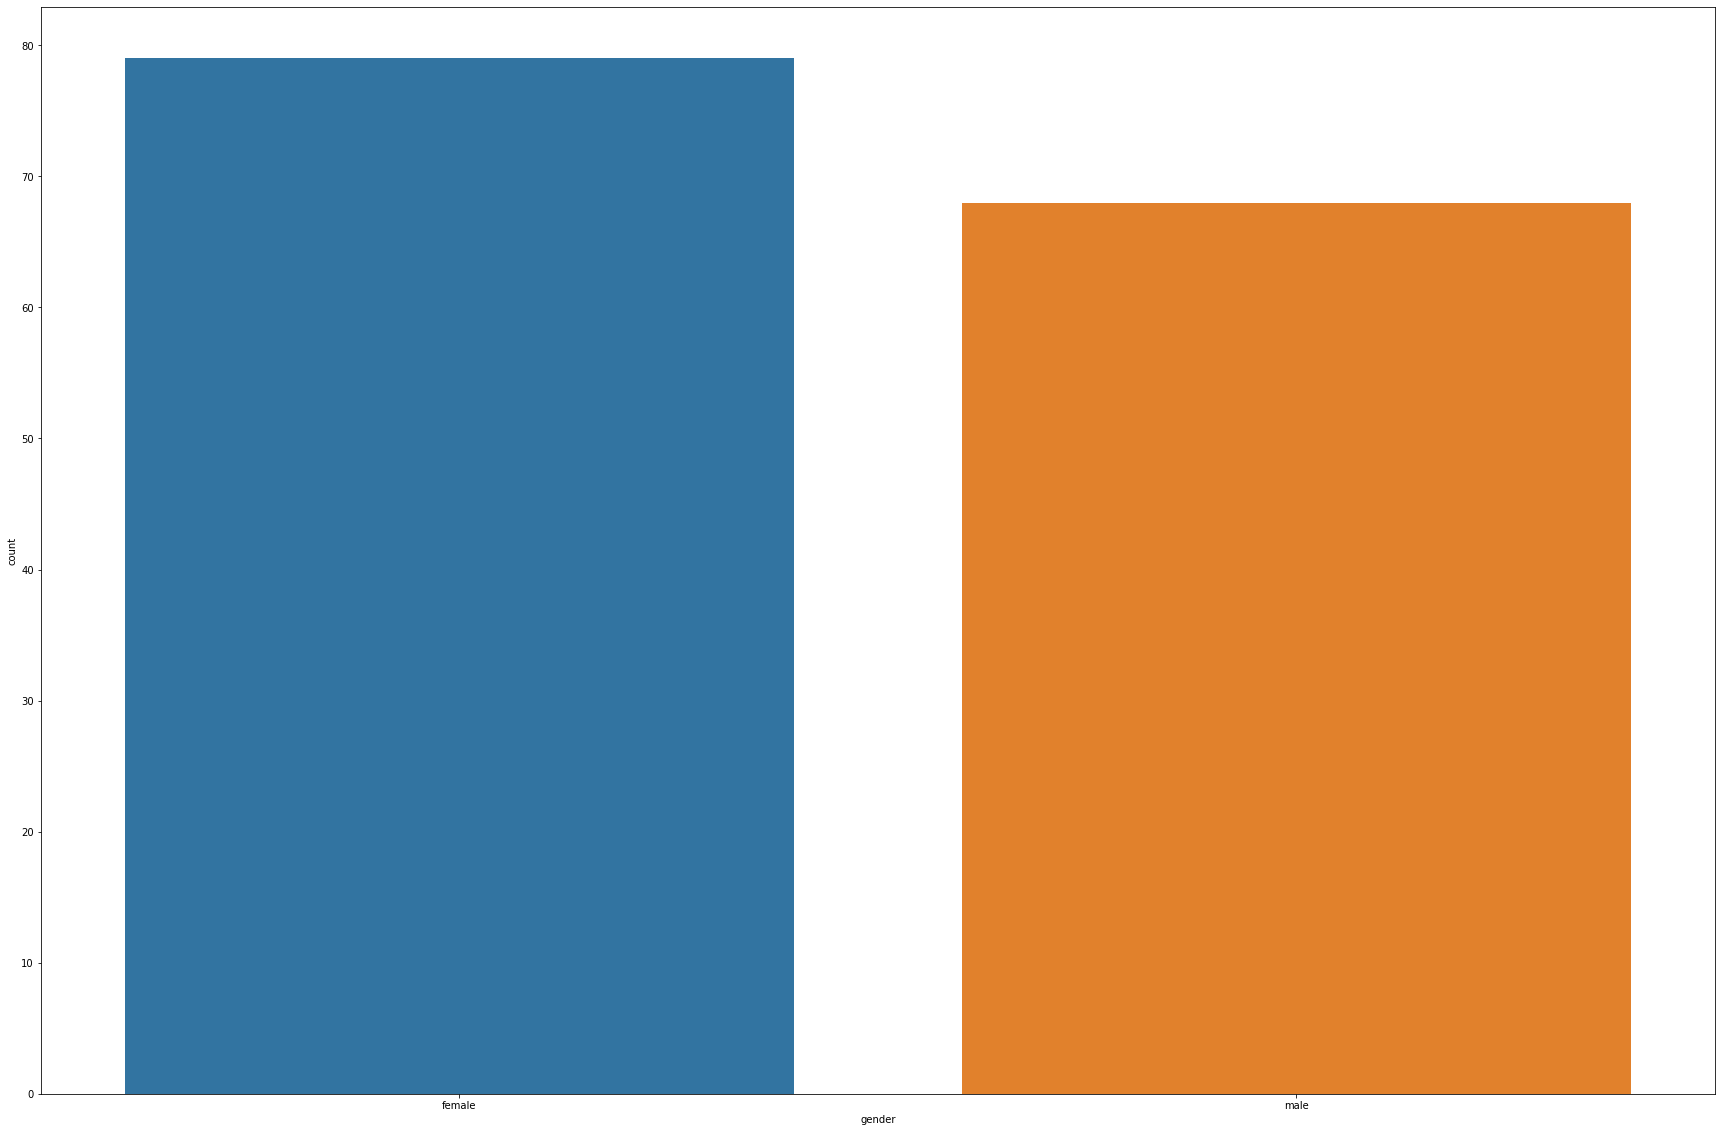

In [73]:
##count plot{{{{basically used w.r.t. categorical variables}}}}

sns.countplot(x ='gender', data=genbased_score)

In [76]:
genbased_score[genbased_score['math score']<30]

,math score,gender,counts
0,0,female,1
1,8,female,1
2,18,female,1
3,19,female,1
4,22,female,1
5,23,female,1
6,24,female,1
7,26,female,1
8,27,female,1
9,27,male,1


In [84]:
genbased_score[genbased_score['math score']<30]['gender'].count()

12

In [93]:
genbased_score[genbased_score['math score']<30].gender.value_counts()

female    10
male       2
Name: gender, dtype: int64

In [95]:
data.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [96]:
racebased_lunch= data.groupby(['race','lunch']).size().reset_index().rename(columns={0:'counts'})

In [97]:
racebased_lunch

,race,lunch,counts
0,group A,free/reduced,36
1,group A,standard,53
2,group B,free/reduced,69
3,group B,standard,121
4,group C,free/reduced,114
5,group C,standard,205
6,group D,free/reduced,95
7,group D,standard,167
8,group E,free/reduced,41
9,group E,standard,99
